In [128]:
# https://dacon.io/en/codeshare/4429

In [129]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
diabetes = load_diabetes()
df_X = diabetes.data
df_Y = diabetes.target

In [130]:
type(diabetes)

sklearn.utils.Bunch

In [131]:
dir(diabetes)

['DESCR',
 'data',
 'data_filename',
 'data_module',
 'feature_names',
 'frame',
 'target',
 'target_filename']

In [132]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [133]:
type(df_X)

numpy.ndarray

In [134]:
type(df_Y)

numpy.ndarray

In [135]:
df_X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [136]:
df_Y.shape

(442,)

In [137]:
 X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size = 0.2, random_state=42)

In [138]:
print(X_train.shape, y_train.shape)

(353, 10) (353,)


In [139]:
import numpy as np
W = np.random.rand(10) # features
b = np.random.rand()
print(W)
print(b)

[0.46815557 0.80576912 0.34446777 0.8498991  0.7729411  0.82208712
 0.06680158 0.92559252 0.21588134 0.33489244]
0.6655877760128361


In [140]:
def model(df_X, W, b):
    predictions = 0
    for i in range(10):
        predictions += df_X[:, i] * W[i]
    predictions += b
    return predictions


In [141]:
def MSE(a,b):
    mse = ((a - b)**2).mean()
    return mse

In [142]:
def loss(df_X, W, b, df_Y):
    predictions = model(df_X, W, b)
    L = MSE(predictions, df_Y)
    return L

In [143]:
df_X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [144]:
def gradient(df_X, W, b, df_Y):
    
    N = len(df_Y)
    
    y_pred = model(df_X, W, b)
    
    dW = 1/N * 2* df_X.T.dot(y_pred - df_Y)
    
    db = 2*(y_pred - df_Y).mean()
    return dW, db    

In [145]:
dW, db = gradient(df_X, W, b, df_Y)
print(dW) 
print(db)

[-1.36878592 -0.30798358 -4.28780217 -3.22453442 -1.54106975 -1.26262693
  2.88511408 -3.14048681 -4.13495988 -2.79255382]
-302.9357927737662


In [146]:
learning_rate = 0.05

Iteration 10 : Loss 2951.2478
Iteration 20 : Loss 2951.0305
Iteration 30 : Loss 2950.8141
Iteration 40 : Loss 2950.5986
Iteration 50 : Loss 2950.3842
Iteration 60 : Loss 2950.1706
Iteration 70 : Loss 2949.9581
Iteration 80 : Loss 2949.7464
Iteration 90 : Loss 2949.5357
Iteration 100 : Loss 2949.3260
Iteration 110 : Loss 2949.1172
Iteration 120 : Loss 2948.9093
Iteration 130 : Loss 2948.7023
Iteration 140 : Loss 2948.4962
Iteration 150 : Loss 2948.2911
Iteration 160 : Loss 2948.0868
Iteration 170 : Loss 2947.8835
Iteration 180 : Loss 2947.6811
Iteration 190 : Loss 2947.4795
Iteration 200 : Loss 2947.2789
Iteration 210 : Loss 2947.0791
Iteration 220 : Loss 2946.8803
Iteration 230 : Loss 2946.6823
Iteration 240 : Loss 2946.4851
Iteration 250 : Loss 2946.2889
Iteration 260 : Loss 2946.0935
Iteration 270 : Loss 2945.8990
Iteration 280 : Loss 2945.7053
Iteration 290 : Loss 2945.5125
Iteration 300 : Loss 2945.3205
Iteration 310 : Loss 2945.1294
Iteration 320 : Loss 2944.9391
Iteration 330 : L

Iteration 2990 : Loss 2914.7733
Iteration 3000 : Loss 2914.7118
Iteration 3010 : Loss 2914.6505
Iteration 3020 : Loss 2914.5894
Iteration 3030 : Loss 2914.5286
Iteration 3040 : Loss 2914.4681
Iteration 3050 : Loss 2914.4077
Iteration 3060 : Loss 2914.3476
Iteration 3070 : Loss 2914.2878
Iteration 3080 : Loss 2914.2282
Iteration 3090 : Loss 2914.1688
Iteration 3100 : Loss 2914.1097
Iteration 3110 : Loss 2914.0508
Iteration 3120 : Loss 2913.9921
Iteration 3130 : Loss 2913.9337
Iteration 3140 : Loss 2913.8755
Iteration 3150 : Loss 2913.8175
Iteration 3160 : Loss 2913.7598
Iteration 3170 : Loss 2913.7023
Iteration 3180 : Loss 2913.6450
Iteration 3190 : Loss 2913.5880
Iteration 3200 : Loss 2913.5311
Iteration 3210 : Loss 2913.4745
Iteration 3220 : Loss 2913.4181
Iteration 3230 : Loss 2913.3620
Iteration 3240 : Loss 2913.3061
Iteration 3250 : Loss 2913.2503
Iteration 3260 : Loss 2913.1949
Iteration 3270 : Loss 2913.1396
Iteration 3280 : Loss 2913.0845
Iteration 3290 : Loss 2913.0297
Iteratio

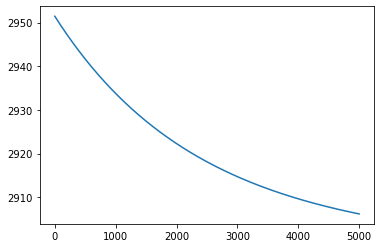

In [156]:
losses = []

for i in range(1, 3001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= learning_rate * dW
    b -= learning_rate * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [157]:
W, b

(array([  40.27791669, -216.71381282,  525.21909321,  331.51430447,
         -79.04587016, -125.43683518, -217.84531978,  144.9223871 ,
         387.63257682,  100.448142  ]),
 151.33952004137754)

In [158]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2870.6548280224097

In [150]:
print(X_test.shape, y_test.shape)

(89, 10) (89,)


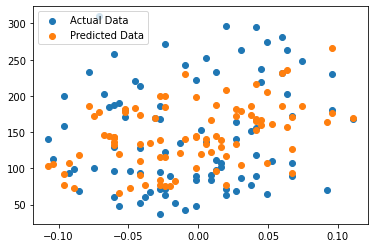

In [151]:
plt.scatter(X_test[:, 0], y_test, label='Actual Data')
plt.scatter(X_test[:, 0], prediction, label='Predicted Data')
plt.legend()
plt.show()

In [152]:
import pandas as pd
diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
